# 1. Plagiarism detection using Rolling Hashing

Hash table will have 199 slots with indices 0 to 198 and mod value q of 199 will be used, because 199 is a relatively large prime number that would help avoid collisions. The hash table will contain substrings of the first string x and would be used to compare with the hash values of the second string y, to find common substrings between x and y. Only if the two substring's hash values match, then they are compared using their actual string values. This leads time complexity spent on computing and storing values to drastically decrease to Theta(n) where n is the length of the two strings (assuming they have the same length). If we compare the substring's acutal string value right away without using hash table and comparing hash values, then such naive solution would give a Theta(n^2) complexity because of nested loops each iterating n times.

In [1]:
def hash(word):
    """
    Returns hash value of string
    Input:
    - word: string
    Output:
    - hash value in range 0 and 198
    """
    # make all characters lower case
    word=word.lower()
    # base
    base = 7
    # exponent for the base
    exp = len(word) - 1
    # n in hash function h(n)=n mod q, when q=199
    n = 0
    
    for char in word: 
        # add unicode value of character times appropriate base
        n += ord(char)*(base**exp)
        #decrease exponent by 1
        exp -= 1
    # return hash value h(n)=n mod 199
    return n%199
    

def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    
    # initialize hash table
    hashtable = [[] for i in range(199)] 
    
    # preprocess string x and y (convert all characters to lower case, remove special characters)
    x = x.lower().replace(" ","").replace(",","").replace(".","").replace("?","").replace("-","").replace("'","") 
    y = y.lower().replace(" ","").replace(",","").replace(".","").replace("?","").replace("-","").replace("'","")
    
    # list containing the indices of the common substrings
    common = [] 
    
    # iterate through string x and store in hash table
    for i in range(len(x)-k+1):
        # initialize hash value
        if(i == 0):
            h1 = hash(x[i:i+k])
        else: 
            # compute hash value of next substring by rolling hashing
            h1 = (h1*7 + ord(x[i+k-1]))%199
            h1 = (h1 - ord(x[i-1])*((7**k)%199))%199
        # append substring and index to hash table
        hashtable[h1].append((x[i:i+k],i))
    
    # iterate through string y
    for j in range(len(y)-k+1):
        if(j == 0): 
            h2 = hash(y[j:j+k])
        else:
            h2 = (h2*7 + ord(y[j+k-1]))%199
            h2 = (h2 - ord(y[j-1])*((7**k)%199))%199
        # check whether substring of y exists in hash table of same hash value
        for i in hashtable[h2]:
            # if substring exists,
            if(y[j:j+k] == i[0]):
                # append substring and index to list
                common.append((i[1],j))
    # return list that contains common substrings and their indices
    return common

In [2]:
# Verify whether long inputs work
assert rh_get_match("Peter Piper picked a peck of pickled peppers. A peck of pickled peppers Peter Piper picked.","If Peter Piper picked a peck of pickled peppers. Where’s the peck of pickled peppers Peter Piper picked?",35)==[(0, 2), (1, 3), (2, 4), (38, 49), (39, 50)]
# Verify whether single character inputs work
assert rh_get_match("Yo I am awesome","a",1)==[(3, 0), (5, 0)]
# Verify whether inputs with special characters work
assert rh_get_match("I'm light-hearted","imlthe",3) == [(0, 0), (6, 3)] 
# Verify whether repeating same substring inputs work
assert rh_get_match("awe awe awesome","awe",3)==[(0, 0), (3, 0), (6, 0)]
# Verifty whether substrings with multiple spaces and capitalized letters work
assert rh_get_match("I LOVE to   be loVely","love",3)==[(1, 0), (9, 0), (2, 1), (10, 1)]

# 2. Plagiarism detection using Regular Hashing

In [3]:
def hash2(word):
    """
    Returns] hash value of string (without using modulo)
    Input:
    - word: string
    Output:
    - hash value in range 0 to 198
    """
    #make all characters lower case
    word=word.lower()
    # maximum hash value
    max = 0
    # minimum hash value
    min = 0
    for i in range(len(word)): 
        # compute maximum hash value when all characters are letter z
        max = max*128 + ord('z')
        # compute minimum hash value when all characters are letter a
        min = min*128 + ord('a')
        
    # compute divider so that hash value is between 0 and 199
    divider = (max - min) // 199 + 1 
    
    # initialize hash value
    h = 0
    for chr in word:
        # add unicode values of each character times appropriate base
        h = h * 128 + ord(chr) 
    # divide hash value by the divider to make it between 0 and 199
    return (h-min)//divider 

def regular_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    NOT using rolling hashing on both strings.
    Input:
    - x, y: strings
    - k: int, length of substring
    Output:
    - A list of tuples (i, j)
    where x[i:i+k] = y[j:j+k]
    """
    #initialize hash table
    hashtable = [[] for i in range(199)]
    
    # preprocess string x and y (convert all characters to lower case, remove special characters)
    x = x.lower().replace(" ","").replace(",","").replace(".","").replace("?","").replace("-","").replace("'","") 
    y = y.lower().replace(" ","").replace(",","").replace(".","").replace("?","").replace("-","").replace("'","")
                 
    # list containing the indices of the common substrings
    common = []
    
    # itertate through string x and store in hash table
    for i in range(len(x)-k+1):
        p = hash2(x[i:i+k])
        hashtable[p].append((x[i:i+k],i))
    
    # iterate through string y
    for j in range(len(y)-k+1): 
        t = hash2(y[j:j+k])
        # check whether substring of y exists in hash table of same hash value
        for i in hashtable[t]:
            # if substring exists,
            if(y[j:j+k] == i[0]): 
                # append substring and index to list
                common.append((i[1],j))
    # return list that contains common substrings and their indices
    return common

In [4]:
# Verify whether single character inputs work
assert rh_get_match("Yo I am awesome","a",1)==[(3, 0), (5, 0)]
# Verify whether inputs with special characters work
assert rh_get_match("I'm light-hearted","imlthe",3) == [(0, 0), (6, 3)] 
# Verify whether repeating same substring inputs work
assert rh_get_match("awe awe awesome","awe",3)==[(0, 0), (3, 0), (6, 0)]
# Verifty whether substrings with multiple spaces and capitalized letters work
assert rh_get_match("I LOVE to   be loVely","love",3)==[(1, 0), (9, 0), (2, 1), (10, 1)]

The following histogram plot empirically proves that the regular hashing function gives uniform distribution of hash values. The plot represents the frequency of hash values of randomly made strings using regular hashing and we can see that each bar of hash value ranges have similiar frequency.

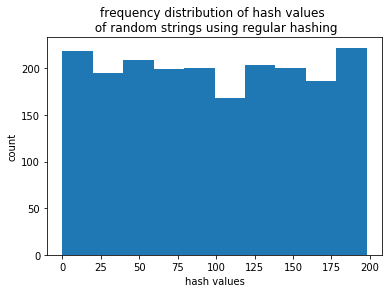

In [8]:
import random
import string 
import matplotlib.pyplot as plt

random.seed(100)

# list of words
words = []

# randomly make words of multiple lengths
for length in range(5,2005):
    word = ""
    for _ in range(length):
        word += random.choice(string.ascii_letters)
    # store randomly made words in list
    words.append(word)

# list of hash values of random words
hashes = []
for i in range(0,2000):
    hashes.append(hash2(words[i]))
plt.hist(hashes)
plt.ylabel("count")
plt.xlabel("hash values")
plt.title("frequency distribution of hash values \n of random strings using regular hashing")
plt.show()

### Detecting extent of plagiarism

Finding the appropriate value of K to pass onto the functions will be important. If K is too small, then we will have to store unnecessarily large amount of substrings into the hash table. For example, if K is 1 then every letter would have to be stored in the hash table and every common letter would count as plagiarism, going against the purpose of our detector. If K is too large, then we may not be able to detect plagiarism done in small phrases.

According to online resources, average length of one sentence is 15 to 20 words(https://medium.com/@theacropolitan/sentence-length-has-declined-75-in-the-past-500-years-2e40f80f589f#:~:text=On%20average%2C%20sentences%20today%20range,per%20sentence%20in%20some%20years.) and the average length of one word is 4.7 letters (http://norvig.com/mayzner.html). This means that the average length of a sentence in letters would be (15+20)/2 * 4.7 = 82.25.

So, I would first pass K as the average length of sentences 82, to approximately check whether sentences were entirely copy and pasted. Plagiarism percentage would be (number of common substrings)/(total letter length of input - 82) and if this percentage is larger than maybe 10%, then it is considered to be plagiarized because copy and pasting entire sentences is straightforward plagiarism. If the first test does not show plagiarism, I would go in more detail by passing K as the average length of words 5. Plagiarism percentage would be (number of common substrings)/(total letter length of input - 5) and if this percentage is larger than maybe 80%, then it is considerted to be plagiarized because most words are in common.

### Drawbacks

One of the function's pitfalls is that when spaces and special characters are removed, words and sentences can not be differentiated. For example if x="large help" and y="Pimple is large. Help is needed", commong substring "large help" would be counted as common substrings although they are separated by "." and thus may over-detect plagiarism. Another pitfall is that strings are potentially counted multiple times and thus may over-detect plagiarism. For example if x="I can swim" and y="I can't swim because I can't float", common substring "can't" will be counted twice.

### Complexity Analysis

Rolling Hashing scales linearly and has time complexity of O(n) because the for loop runs for each letter in the string input and rest of the code causes constant time complexity. More specifically, calling hash functions for two strings would be each O(n) and comparing them would be O(n), leading their total to still scale linearly as O(n).
Regular Hashing scales linearly but has time complexity of O(n*k) because the for loop runs for each letter in the string input and length of each word would be k when function is called and rest of the code causes constant time complexity. Different from rolling hashing though, the hash function is called in every for loop iteration causing O(n*k).

In [6]:
import time
import random
import string
import matplotlib.pyplot as plt
random.seed(100)

# two lists of words to compare
words1 = []
words2 = []

# randomly make words of multiple lengths
for length in range(5,2006):
    word1 = ""
    word2 = ""
    for _ in range(length): 
        word1 += random.choice(string.ascii_letters)
        word2 += random.choice(string.ascii_letters)
    # store randomly made words in the lists
    words1.append(word1)
    words2.append(word2)
    
# list to store times first rolling hash function and second regular hash function takes
time1 = []
time2 = []

# iterate through the two word lists
for i in range(1,2001):
    start = time.time()
    rh_get_match(words1[i],words2[i],i) 
    end = time.time() 
    # store regular hash function time duration
    time1.append(end-start)
    start = time.time()
    regular_get_match(words1[i],words2[i],i) 
    end = time.time()
    # store rolling hash function time duration
    time2.append(end-start)

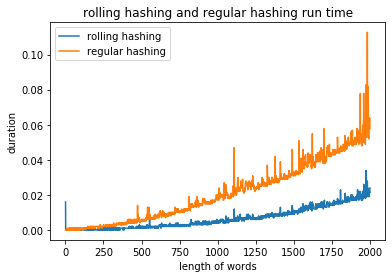

In [7]:
# x coordinates that represent length of words
xcoor = [i for i in range(1,2001)]

plt.plot(xcoor,time1, label = "rolling hashing")
plt.plot(xcoor,time2, label = "regular hashing")
plt.xlabel("length of words")
plt.ylabel("duration")
plt.legend()
plt.title("rolling hashing and regular hashing run time")
plt.show()

### HC and LO Applications

#algorithm: use two rolling and regular hashing algorithms to perform the same task of plagiarism detection
#context: explains practical use and pitfalls of the algorithm by considering real life context of plagiarism detection
#evidencebased: uses appropriate evidence to back up claims such as histograms to prove uniform distribution and plots runtime difference
#complexityanalysis:rolling and regular hash function complexity are compared empirically and asymptotically.
#computationalcritique: algorithm's real life use and drawbacks are explained
#pythonprogramming: appropriate python libraries and data structures were used
#codereadability: document strings and comments are well written